In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from keras.datasets import mnist
from keras.utils import np_utils

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [17]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [18]:
X_train = X_train.reshape(-1,28,28,1) # (60000,28,28,1)
X_test = X_test.reshape(-1,28,28,1) # (60000,28,28,1)

In [19]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


In [14]:
from keras.models import Sequential, save_model
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout

In [15]:
model = Sequential()

model.add(Conv2D(32, 3,3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64,3,3, activation='relu'))

model.add(MaxPool2D(2,2))

model.add(Conv2D(16, 3,3, activation='relu'))

model.add(Flatten())

model.add(Dropout(0.20))

model.add(Dense(10, activation='softmax'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)  

C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  


In [16]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ["accuracy"])

In [20]:
history = model.fit(X_train, Y_train,
         batch_size = 32,
         epochs= 10,
         verbose = 2, 
         validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 279s - loss: 0.7411 - acc: 0.9140 - val_loss: 0.0559 - val_acc: 0.9814
Epoch 2/10
 - 276s - loss: 0.0749 - acc: 0.9766 - val_loss: 0.0610 - val_acc: 0.9805
Epoch 3/10
 - 280s - loss: 0.0613 - acc: 0.9808 - val_loss: 0.0554 - val_acc: 0.9823
Epoch 4/10
 - 279s - loss: 0.0518 - acc: 0.9837 - val_loss: 0.0379 - val_acc: 0.9894
Epoch 5/10
 - 277s - loss: 0.0450 - acc: 0.9865 - val_loss: 0.0426 - val_acc: 0.9863
Epoch 6/10
 - 280s - loss: 0.0399 - acc: 0.9878 - val_loss: 0.0397 - val_acc: 0.9877
Epoch 7/10
 - 276s - loss: 0.0373 - acc: 0.9881 - val_loss: 0.0436 - val_acc: 0.9865
Epoch 8/10
 - 265s - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0378 - val_acc: 0.9899
Epoch 9/10
 - 188s - loss: 0.0322 - acc: 0.9900 - val_loss: 0.0395 - val_acc: 0.9877
Epoch 10/10
 - 184s - loss: 0.0284 - acc: 0.9909 - val_loss: 0.0423 - val_acc: 0.9889


In [21]:
model.save("my_mnist.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
from keras.models import load_model

C:\Users\AASHISH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = load_model('Models/my_mnist.h5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_______________________________________

In [20]:
scores = model.evaluate(X_test, Y_test, verbose=0)

In [21]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 98.89%


In [31]:
print(scores)

[0.04228977839742511, 0.9889]


[9]


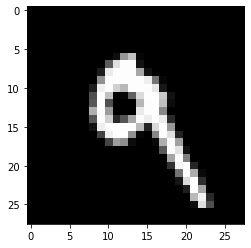

In [23]:
image_index = 7
img = X_test[image_index].reshape(28, 28)
plt.imshow(img,cmap='gray')
print(model.predict_classes(X_test[image_index].reshape(1, 28, 28, 1)))